# UMR QB1 - Seminar zur Genexpressionsanalyse

---

## Medizinisches Problem & Forschungsfrage

**"_Was sind die molekularen Unterschiede zwischen Krebszellen und normalem menschlichem Gewebe, und wie können wir diese Unterschiede nutzen, um neue therapeutische Ziele und deren Medikamente für die Krebsbehandlung zu identifizieren?_"**

### **Warum dies für die Medizin wichtig ist:**
- **Krebsheterogenität:** Verschiedene Krebsarten haben unterschiedliche molekulare Signaturen
- **Präzisionsmedizin:** Behandlungen müssen auf spezifische Krebsarten zugeschnitten werden
- **Medikamentenresistenz:** Krebszellen entwickeln sich weiter, um der Behandlung zu entkommen
- **Therapeutische Ziele:** Neue Medikamente werden dringend für bessere Patientenergebnisse benötigt

### **Was wir entdecken werden:**
1. **Molekulare Krebssignaturen:** Gene, die konsistent im Vergleich von Krebs zu normalem Gewebe verändert sind
2. **Therapeutische Schwachstellen:** Signalwege, die mit Medikamenten gezielt angesteuert werden können
3. **Möglichkeiten zur Medikamentenumwidmung:** Bestehende Medikamente, die Krebs behandeln könnten
4. **Biomarker-Identifikation:** Gene, die das Ansprechen auf die Behandlung vorhersagen könnten

---


## Datensatz: Eine reale Studie zu Krebs vs. normalem Gewebe

**Klinischer Kontext:** Universal Human Reference (UHR) vs. Human Brain Reference (HBR)  
**Medizinische Relevanz:** Krebszelllinien vs. normales menschliches Hirngewebe<br>
**Stichprobengröße:** 6 Proben (3 Krebsreplikate vs. 3 normale Hirnreplikate)  
**Datentyp:** Paired-End-RNA-Sequenzierung (Chromosom 22 Subset)  
**Referenz:** Griffith M, Walker JR, Spies NC, Ainscough BJ, Griffith OL (2015) Informatics for RNA Sequencing: A Web Resource for Analysis on the Cloud. *PLoS Comput Biol* 11(8): e1004393. https://doi.org/10.1371/journal.pcbi.1004393



### **Medizinische Proben**

#### **UHR (Universal Human Reference) = KREBSPROBEN**
- **Zusammensetzung:** Gesamt-RNA aus 10 verschiedenen menschlichen Krebszelllinien
- **Enthaltene Krebsarten:** Brust-, Leber-, Gebärmutterhals-, Hoden-, Gehirn-, Hautkrebsarten plus Immunzellen (T-Zellen, B-Zellen, Makrophagen, Histiozyten)
- **Warum dies wichtig ist:** Repräsentiert die gemeinsamen molekularen Merkmale verschiedener Krebsarten
- **Klinische Relevanz:** Hilft bei der Identifizierung pan-karzinogener therapeutischer Ziele

#### **HBR (Human Brain Reference) = KONTROLLEN AUS NORMALEM GEWEBE**
- **Zusammensetzung:** Gesamt-RNA aus Gehirnen von 23 gesunden Kaukasiern, meist 60-80 Jahre alt
- **Warum Hirngewebe:** Bietet eine Basislinie für den Vergleich mit normalem Gewebe
- **Klinische Relevanz:** Zeigt, wie "gesunde" Genexpression aussieht

### **Die biologische Hypothese:**
**Krebszellen werden systematische Veränderungen in der Genexpression im Vergleich zu normalem Gewebe zeigen und Folgendes offenbaren:**
1. **Onkogene** (krebsfördernde Gene), die überexprimiert sind
2. **Tumorsuppressoren** (krebsverhindernde Gene), die stillgelegt sind
3. **Stoffwechselwege**, die verändert wurden, um Krebswachstum zu unterstützen
4. **Medikamentenziele**, die Krebszellen selektiv abtöten könnten

---

## Lernziele


**Technische Fähigkeiten:**
1. Durchführung einer Differenzialexpressionsanalyse zur Identifizierung von Krebs-Biomarkern
2. Durchführung einer Pathway-Anreicherung zum Verständnis der Krebsbiologie
3. Verwendung von computergestützter Medikamentenumwidmung für therapeutische Entdeckungen

**Medizinisches Verständnis:**
1. **Interpretation von Krebsgensignaturen** im klinischen Kontext
2. **Identifikation potenzieller Biomarker** für Krebsdiagnose/-prognose
3. **Verständnis der Medikamentenumwidmung** als Strategie für schnellere therapeutische Entwicklung
4. **Verbindung computergestützter Erkenntnisse** mit realen Krebsbehandlungsentscheidungen

**Klinische Translation:**
1. **Bewertung therapeutischer Ziele**, die durch RNA-seq identifiziert wurden
2. **Bewertung von Medikamentenkandidaten** für das Krebsbehandlungspotenzial
3. **Verständnis von Präzisionsmedizin**-Ansätzen in der Krebsversorgung

---

## Setup und Einführung

#### Conda installieren

Nach dem Ausführen dieser Zelle wird die Laufzeit automatisch neu gestartet. Warten Sie, bis dies abgeschlossen ist, und fahren Sie dann fort. Ignorieren Sie Fehlermeldungen und Warnungen

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


#### Conda-Installation überprüfen

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


#### Alle erforderlichen Software und Pakete installieren

In [2]:
%%bash
conda install -c bioconda -c conda-forge bioconductor-deseq2 r-optparse r-ggplot2 r-gprofiler2 r-dplyr r-tidyr -y -q 2>&1

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconductor-deseq2
    - r-dplyr
    - r-ggplot2
    - r-gprofiler2
    - r-optparse
    - r-tidyr


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    argcomplete-3.6.3          |     pyhd8ed1ab_0          41 KB  conda-forge
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    bioconductor-biobase-2.66.0|    r44h3df3fcb_0         2.6 MB  bioconda
    bioconductor-biocgenerics-0.52.0|    r44hdfd78af_3         678 KB  bioconda
    bioconductor-biocparallel-1.40.0|    r44he5774e6_1         1.6 MB  bioconda
    bioconductor-data-packages-20250625|       hdfd78af_0         250 KB  bioconda
    bioconductor-d

#### Daten- und Skript-Repository

- Expressionsdaten: Vorverarbeitete RNA-seq-Datendateien und Count-Matrix
- Analyseskripte für jeden Schritt
- Referenzgenomdateien und Annotationen

In [3]:
%%bash
git clone https://gitlab.uni-rostock.de/wb283/qb1rnaseq.git

Cloning into 'qb1rnaseq'...


In [4]:
%%bash
ls

condacolab_install.log
qb1rnaseq
sample_data


In [5]:
# Change working directory permanently
import os
os.chdir('qb1rnaseq')

In [6]:
%%bash
ls

counts.tsv
drug_repositioning.py
expression_technology_comparison_ed2.jpg
griffith-data.tar.gz
load_data.R
mapping.sh
pathway_analysis.R
README.md
rnaseq_experiments.png
rnaseq_expression_table_ed2.jpg
rnaseq_mapping_example_ed2.jpg
run_deseq2.R
samples.tsv
V57


In [7]:
%%bash
tar xzf griffith-data.tar.gz

In [8]:
%%bash
ls

counts.tsv
drug_repositioning.py
expression_technology_comparison_ed2.jpg
griffith-data.tar.gz
load_data.R
mapping.sh
pathway_analysis.R
README.md
reads
refs
rnaseq_experiments.png
rnaseq_expression_table_ed2.jpg
rnaseq_mapping_example_ed2.jpg
run_deseq2.R
samples.tsv
V57


---

## Genexpression

![](https://gitlab.uni-rostock.de/wb283/qb1rnaseq/-/raw/main/expression_technology_comparison_ed2.jpg)

**Was ist RNA-seq?**
RNA-seq bestimmt, wie viele RNA-Moleküle (Genexpression) in jeder Probe für jedes Gen vorhanden waren. Dieser Prozess umfasst:

1. **Reads zuordnen**: Bestimmen, von welchem Gen/Transkript jeder Sequenzierungs-Read stammt
2. **Zählen**: Aufaddieren, wie viele Reads auf jedes Gen abgebildet werden
3. **Normalisierung**: Anpassen für Unterschiede in der Sequenzierungstiefe und Genlänge

![](https://gitlab.uni-rostock.de/wb283/qb1rnaseq/-/raw/main/rnaseq_experiments.png)


**Warum Count-Daten verwenden?**
- **Rohe Counts**: Repräsentieren die tatsächliche Anzahl der Sequenzierungs-Reads pro Gen
- **Statistische Anforderungen**: Count-basierte statistische Modelle (wie DESeq2) benötigen Integer-Counts
- **Vergleichbarkeit**: Counts können über Proben hinweg normalisiert werden für einen fairen Vergleich

![](https://gitlab.uni-rostock.de/wb283/qb1rnaseq/-/raw/main/rnaseq_mapping_example_ed2.jpg)

![](https://gitlab.uni-rostock.de/wb283/qb1rnaseq/-/raw/main/rnaseq_expression_table_ed2.jpg)


**Medizinische Bedeutung**

- Onkogene (überexprimiert bei Krebs)
- Tumorsuppressoren (unterexprimiert bei Krebs)
- Potenzielle therapeutische Ziele




---

## 1 Daten


### 1.1 Datensatz: Metadaten und Sequenzierungen

- **UHR-Proben**: Gemischte Krebszelllinien (Universal Human Reference)
- **HBR-Proben**: Normales Hirngewebe (Human Brain Reference)
- **Chr22-Subset**: Bildungsdatensatz mit Fokus auf Chromosom 22-Gene


In [9]:
%%bash
cat samples.tsv

sample	condition	tissue_type	clinical_context
UHR_rep1	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep1
UHR_rep2	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep2
UHR_rep3	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep3
HBR_rep1	normal	brain_tissue	Human Brain Reference Rep1
HBR_rep2	normal	brain_tissue	Human Brain Reference Rep2
HBR_rep3	normal	brain_tissue	Human Brain Reference Rep3

### 1.2 Genannotationen (GTF-Format)

- **Spalte 1**: Chromosomenname (22)
- **Spalte 2**: Annotationsquelle (z.B. Ensembl, HAVANA)
- **Spalte 3**: Feature-Typ (z.B. Gen, Transkript, Exon)
- **Spalten 4-5**: Start- und Endpositionen
- **Spalte 7**: Strang (+ oder -)
- **Spalte 9**: Attribute (gene_id, gene_name, etc.)


In [10]:
%%bash
ls refs/

22.fa
22.gtf
ERCC92.fa
ERCC92.gtf


In [11]:
%%bash
# transcriptome annotations
head refs/22.gtf

chr22	ENSEMBL	gene	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; level 3;
chr22	ENSEMBL	transcript	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; transcript_id "ENST00000615943.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; transcript_type "snRNA"; transcript_status "NOVEL"; transcript_name "U2.14-201"; level 3; tag "basic"; transcript_support_level "NA";
chr22	ENSEMBL	exon	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; transcript_id "ENST00000615943.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; transcript_type "snRNA"; transcript_status "NOVEL"; transcript_name "U2.14-201"; exon_number 1; exon_id "ENSE00003736336.1"; level 3; tag "basic"; transcript_support_level "NA";
chr22	ENSEMBL	gene	10936023	10936161	.	-	.	gene_id "ENSG00000274237.1"; gene_type "miRNA"; gene_status "NOVEL"; gene_name "CU459211.1"; level 3;
chr22	ENSEMBL	transcript	10936023	10936161	.	-	.	gene_id "ENSG00000274237.

### 1.3 DNA-Sequenz (FASTA-Format)

- **Kopfzeile** (`>`): Sequenzidentifikator und Beschreibung
- **Sequenzzeilen**: DNA-Basen (A, T, G, C)
- **Verwendung**: Referenzgenom für die Read-Zuordnung


In [12]:
%%bash
# sequence data
head refs/22.fa

>chr22
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


### 1.4 Genexpressions-Count-Matrix

**Was ist eine Count-Matrix?**
Die Count-Matrix ist die fundamentale Datenstruktur für RNA-seq-Analysen:

- **Zeilen**: Gene oder Transkripte
- **Spalten**: Proben (UHR vs. HBR Replikate)
- **Werte**: Anzahl der Sequenzierungs-Reads, die jedem Gen in jeder Probe zugeordnet sind

**Woher kommt die Count-Matrix?**
1. **Salmon Quantifizierung**: Zählt Reads für jedes Transkript
2. **Aggregation**: Kombiniert Transkript-Counts zu Gen-Counts
3. **Matrix-Format**: Organisiert alle Proben zur Analyse


In [13]:
%%bash
head counts.tsv

	UHR_rep1	UHR_rep2	UHR_rep3	HBR_rep1	HBR_rep2	HBR_rep3
ENST00000615943.1	0	0	0	0	0	0
ENST00000618365.1	0	0	0	0	0	0
ENST00000623473.1	0	0	0	0	0	0
ENST00000624155.1	0	0	0	0	0	0
ENST00000422332.1	0	1	0	0	0	0
ENST00000612732.1	0	0	0	0	0	0
ENST00000614148.1	0	0	0	0	0	0
ENST00000614087.1	0	0	0	0	0	0
ENST00000621672.1	0	0	0	0	0	0


**Verständnis der Count-Matrix-Struktur:**

**Gene_ID-Spalte:**
- **Transkript-Identifikatoren**: Aus den Ensembl-Annotationen (z.B. ENST00000...)
- **Eindeutige IDs**: Jede Zeile repräsentiert ein einzigartiges Transkript/Gen
- **Annotations-Match**: Entspricht Einträgen in der GTF-Datei

**Proben-Spalten (UHR und HBR):**
- **UHR (Universal Human Reference)**: Krebs-Proben
  - UHR_1, UHR_2, UHR_3 = biologische Replikate von gemischten Krebszelllinien
- **HBR (Human Brain Reference)**: Normale Proben
  - HBR_1, HBR_2, HBR_3 = biologische Replikate von normalem Hirngewebe

**Count-Werte:**
- **Integer-Zahlen**: Repräsentieren rohe Read-Counts
- **Variabilität**: Höhere Counts = höhere Expression
- **Null-Counts**: Gen nicht exprimiert oder nicht nachweisbar
- **Replikat-Konsistenz**: Ähnliche Counts über Replikate zeigen Zuverlässigkeit

**Medizinische Interpretation:**
- **Vergleich UHR vs. HBR**: Identifiziert Krebs-spezifische Expressionsmuster
- **Hohe UHR-Counts**: Potenzielle Onkogene (krebsfördernde Gene)
- **Hohe HBR-Counts**: Potenzielle Tumorsuppressoren (in Krebs stillgelegt)
- **Ähnliche Counts**: Haushalts-Gene (nicht differenziell exprimiert)


## 2 Differenzialexpression

**Was ist Differenzialexpressionsanalyse?**
Die Differenzialexpressionsanalyse identifiziert Gene, die zwischen Bedingungen (Krebs vs. Normal) signifikant unterschiedlich exprimiert werden. Dies ist der Kernschritt zur Entdeckung:
- **Krebs-Biomarker**: Gene, die Krebs von Normal unterscheiden
- **Therapeutische Ziele**: Gene, die für Medikamentenentwicklung angesteuert werden könnten
- **Biologische Mechanismen**: Wege, die bei Krebs dysreguliert sind

**Das DESeq2-Verfahren:**
1. **Normalisierung**: Anpassung für Unterschiede in der Bibliotheksgröße zwischen Proben
2. **Dispersionsschätzung**: Modellierung der Variabilität zwischen biologischen Replikaten
3. **Statistisches Testen**: Identifizierung signifikant veränderter Gene
4. **Multiple-Test-Korrektur**: Anpassung der P-Werte für Tausende gleichzeitiger Tests

**Ausgabemetriken:**
- **baseMean**: Durchschnittliche normalisierte Counts über alle Proben
- **log2FoldChange**: Wie stark sich die Expression ändert (positiv = höher im Krebs)
- **pvalue**: Statistische Signifikanz der Änderung
- **padj**: Adjustierter P-Wert (nach Korrektur für multiple Tests)

**Signifikanz-Schwellenwerte:**
- **padj < 0,05**: Statistisch signifikant (FDR-korrigiert)
- **|log2FC| > 1**: Biologisch bedeutsame Änderung (2-fach)
- **Kombiniert**: Gene mit beiden Kriterien sind starke Kandidaten


In [14]:
%%bash
# 2025-07-14
Rscript run_deseq2.R \
    --metadata samples.tsv \
    --expression counts.tsv \
    --output-degs degs.tsv \
    --output-plots pca_plot.png,heatmap.png,volcano_plot.png \
    --output-image deseq2_results.RData

Reading input files...
Retained 1567 genes for analysis
Running DESeq2 analysis...
Extracting gene symbols from GTF file...
Mapped 1567 out of 1567 transcripts to gene symbols
Differentially expressed genes written to: degs.tsv 
Generating plots...
null device 
          1 
Checking genes for heatmap...
Genes in res_df: 1466 
Genes in vsd: 1567 
Overlapping genes: 0 
No overlap found, using top genes from vsd directly...
Selected 20 genes for heatmap
Heatmap saved to: heatmap.png 
null device 
          1 
Analysis complete. Plots saved as: pca_plot.png, heatmap.png, volcano_plot.png 
R workspace saved as: deseq2_results.RData 


Warning messages:
1: package ‘DESeq2’ was built under R version 4.4.3 
2: package ‘matrixStats’ was built under R version 4.4.3 
3: package ‘optparse’ was built under R version 4.4.3 
using ntop=500 top features by variance


In [15]:
%%bash
head degs.tsv

transcript_id	gene_symbol	log2FoldChange	padj
ENST00000328933.9	SYNGR1	-5.44971233343666	1.2984070065879e-197
ENST00000396425.7	SEPT3	-4.34445020035159	1.38613580557907e-191
ENST00000407418.7	CBX6	-1.91107694294968	3.33868563830195e-131
ENST00000333039.2	NPTXR	-3.26400647488188	3.03095273074958e-105
ENST00000255882.10	PI4KA	-2.32237418235649	1.98205874397843e-96
ENST00000262795.5	SHANK3	-4.07804763987837	3.84219085794151e-96
ENST00000329492.5	MAPK8IP2	-5.7667403903729	3.26023605271452e-79
ENST00000341184.6	MGAT3	-4.05960810246796	1.3791377151873e-75
ENST00000216133.9	CBX7	-4.22126557190662	1.9292461247474e-74


In [16]:
%%bash
grep "ENST00000328933.9" refs/22.gtf | cut -f9

gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SYNGR1"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SYNGR1-001"; level 2; protein_id "ENSP00000332287.5"; tag "basic"; transcript_support_level "1"; tag "appris_principal_1"; tag "CCDS"; ccdsid "CCDS13989.1"; havana_gene "OTTHUMG00000030978.4"; havana_transcript "OTTHUMT00000075866.2";
gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SYNGR1"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SYNGR1-001"; exon_number 1; exon_id "ENSE00001881197.1"; level 2; protein_id "ENSP00000332287.5"; tag "basic"; transcript_support_level "1"; tag "appris_principal_1"; tag "CCDS"; ccdsid "CCDS13989.1"; havana_gene "OTTHUMG00000030978.4"; havana_transcript "OTTHUMT00000075866.2";
gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9

### Datenvisualisierung für biologische Interpretation

**Warum RNA-seq-Ergebnisse visualisieren?**
Die Visualisierung verwandelt Tausende von Zahlen in verständliche biologische Erkenntnisse und ermöglicht:
- **Mustererkennung**: Identifizierung von Trends über Gene hinweg
- **Qualitätskontrolle**: Erkennung von Ausreißern oder technischen Problemen
- **Hypothesengenerierung**: Vorschlagen neuer biologischer Mechanismen
- **Kommunikation**: Klare Präsentation von Ergebnissen

**Drei Schlüsselvisualisierungen:**
1. **Volcano Plot**: Übersicht über alle Gene (Effektgröße vs. Signifikanz)
2. **PCA Plot**: Probenbeziehungen und Qualitätskontrolle
3. **Heatmap**: Detaillierte Expressionsmuster der Top-Gene


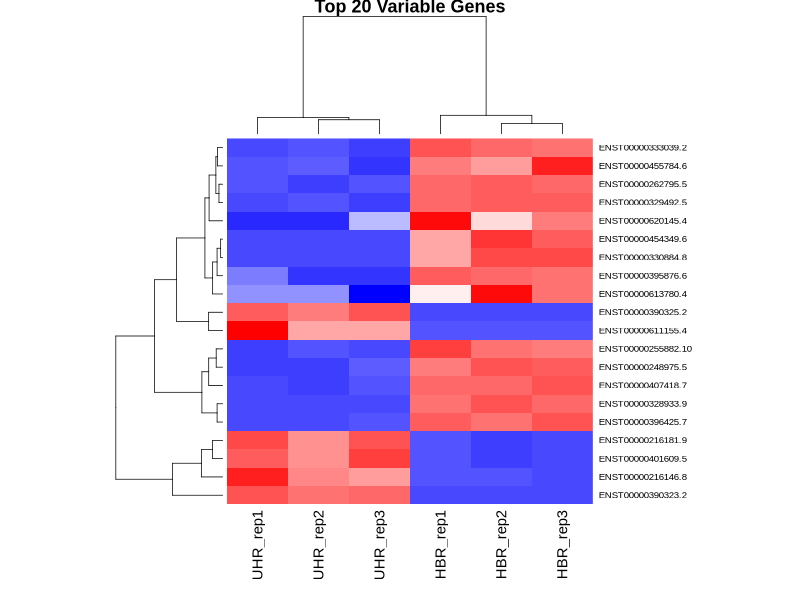

In [17]:
from IPython.display import Image, display
import os

display(Image('heatmap.png'))

Schauen wir uns nun die Annotationen eines dieser Transkripte an, z.B. `ENST00000390323.2`:

In [18]:
%%bash
# Annotations from differentially expressed genes
grep "ENST00000390323.2" refs/22.gtf | cut -f9

gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_type "IG_C_gene"; gene_status "KNOWN"; gene_name "IGLC2"; transcript_type "IG_C_gene"; transcript_status "KNOWN"; transcript_name "IGLC2-001"; level 2; protein_id "ENSP00000374856.2"; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "basic"; transcript_support_level "NA"; tag "appris_principal_1"; havana_gene "OTTHUMG00000151214.3"; havana_transcript "OTTHUMT00000321818.3";
gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_type "IG_C_gene"; gene_status "KNOWN"; gene_name "IGLC2"; transcript_type "IG_C_gene"; transcript_status "KNOWN"; transcript_name "IGLC2-001"; exon_number 1; exon_id "ENSE00001721671.2"; level 2; protein_id "ENSP00000374856.2"; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "basic"; transcript_support_level "NA"; tag "appris_principal_1"; havana_gene "OTTHUMG00000151214.3"; havana_transcript "OTTHUMT00000321818.3";
gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_typ

---

## 3 Pathway-Analyse

### Pathway-Analyse durchführen

**Was ist Pathway-Anreicherungsanalyse?**
Anstatt einzelne Gene zu betrachten, gruppiert die Pathway-Analyse Gene nach ihrer biologischen Funktion und fragt:
- Sind unsere Krebs-assoziierten Gene in bestimmten biologischen Prozessen überrepräsentiert?
- Welche zellulären Wege sind bei Krebs dysreguliert?

**Verwendete Datenbanken:**
1. **Gene Ontology (GO)**:
   - **Biologische Prozesse (BP)**: Zelluläre Funktionen (z.B. Zellzyklus, Apoptose)
   - **Zelluläre Komponenten (CC)**: Subzelluläre Lokalisationen
   - **Molekulare Funktionen (MF)**: Biochemische Aktivitäten

2. **KEGG**: Gut dokumentierte Signalwege und Krankheitswege
3. **Reactome**: Kuratierte biologische Wege und Reaktionen

**Erwartete Krebswege:**
- **Hochreguliert**: Zellzyklusfortschritt, DNA-Replikation, Metabolismus
- **Herunterreguliert**: Apoptose, DNA-Reparatur, Immunantwort

**Klinische Bedeutung:**
- **Medikamentenziele**: Identifizierung beeinträchtigter Wege für Therapie
- **Kombinationstherapie**: Mehrere Wege gleichzeitig ansteuern
- **Resistenzmechanismen**: Verständnis von Ausweichrouten


In [19]:
%%bash
Rscript pathway_analysis.R --input degs.tsv --output pathway_results.tsv

Reading differential expression results...
Found 305 significant genes for pathway analysis
Upregulated genes: 147 
Downregulated genes: 158 
Running pathway enrichment for upregulated genes...
Running pathway enrichment for downregulated genes...
Pathway enrichment results written to: pathway_results.tsv 
Total significant pathways found: 98 

Top 10 enriched pathways:
                                                term_name      p_value
88           modulation of chemical synaptic transmission 0.0007956219
89                 regulation of trans-synaptic signaling 0.0007956219
90                         chemical synaptic transmission 0.0008239786
91                   anterograde trans-synaptic signaling 0.0008239786
92                               trans-synaptic signaling 0.0008239786
93                                     synaptic signaling 0.0010047529
94                                    cell-cell signaling 0.0045194987
1  establishment of protein localization to mitochondrion 0

Warning messages:
1: package ‘gprofiler2’ was built under R version 4.4.3 
2: package ‘optparse’ was built under R version 4.4.3 


In [20]:
%%bash
head pathway_results.tsv

query	source	term_id	term_name	term_size	query_size	intersection_size	p_value	direction
query_1	GO:BP	GO:0050804	modulation of chemical synaptic transmission	513	83	12	0.000795621918582145	downregulated
query_1	GO:BP	GO:0099177	regulation of trans-synaptic signaling	514	83	12	0.000795621918582145	downregulated
query_1	GO:BP	GO:0007268	chemical synaptic transmission	775	83	14	0.00082397860094569	downregulated
query_1	GO:BP	GO:0098916	anterograde trans-synaptic signaling	775	83	14	0.00082397860094569	downregulated
query_1	GO:BP	GO:0099537	trans-synaptic signaling	781	83	14	0.00082397860094569	downregulated
query_1	GO:BP	GO:0099536	synaptic signaling	807	83	14	0.00100475285648607	downregulated
query_1	GO:BP	GO:0007267	cell-cell signaling	1342	83	17	0.00451949865468603	downregulated
query_1	GO:BP	GO:0072655	establishment of protein localization to mitochondrion	123	85	6	0.00745593566650851	upregulated
query_1	GO:BP	GO:0070585	protein localization to mitochondrion	132	85	6	0.007455935666508

---

## 4 Drug Repositioning

### Drug Repositioning in der Krebsforschung

**Was ist Drug Repositioning?**
Drug Repositioning beinhaltet das Finden neuer therapeutischer Anwendungen für bestehende Medikamente. Dieser Ansatz bietet mehrere Vorteile:

1. **Schnellere Entwicklung**: 5-10 Jahre vs. 15-20 Jahre für neue Medikamente
2. **Bekannte Sicherheitsprofile**: Bestehende Medikamente haben etablierte Sicherheitsdaten
3. **Geringere Kosten**: Reduziert das Risiko und die Kosten der Medikamentenentwicklung
4. **Sofortige klinische Anwendung**: Kann in einigen Fällen off-label verschrieben werden

**Wie funktioniert computergestützte Medikamentenumwidmung?**
Unser Ansatz verwendet Genexpressionssignaturen:
1. **Krebssignatur**: Listen von Onkogenen (hochreguliert) und Tumorsuppressoren (herunterreguliert)
2. **Medikamenteneffekt-Datenbank**: Wie Tausende von Medikamenten die Genexpression beeinflussen
3. **Signaturabgleich**: Finden von Medikamenten, die Krebsgenexpressionsmuster umkehren

**Erfolgsgeschichten:**
- **Metformin**: Diabetes-Medikament → Krebsprävention (200+ klinische Studien)
- **Aspirin**: Schmerzlinderung → Krebsprävention (FDA zugelassen)
- **Rapamycin**: Immunsuppressivum → Krebs- und Altersforschung

**Unsere Skriptvorbereitung:**
Konvertiert unsere DESeq2-Ergebnisse in ein Format, das mit L1000CDS2, einer großen Medikamentenumwidmungsdatenbank, kompatibel ist.

### L1000CDS2

**Was ist L1000CDS2?**
L1000CDS2 (L1000 Characteristic Direction Signature) ist ein Tool, das vom Ma'ayan Laboratory entwickelt wurde und:

1. **Datenbankumfang**: Enthält Genexpressionssignaturen für >20.000 Medikamente, die an menschlichen Zelllinien getestet wurden
2. **Signaturabgleich**: Verwendet mathematische Algorithmen, um Medikamente zu finden, die Krankheitssignaturen umkehren
3. **LINCS-Programm**: Teil der NIH Library of Integrated Network-based Cellular Signatures Initiative

**Wie funktioniert der Algorithmus?**
1. **Eingangssignatur**: Unsere Krebsgensignatur (Onkogene + Tumorsuppressoren)
2. **Datenbanksuche**: Vergleicht mit medikamenteninduzierten Expressionsveränderungen
3. **Bewertungssystem**: Berechnet, wie gut jedes Medikament die Krebssignatur umkehrt
4. **Rangfolge**: Gibt Medikamente rangiert nach ihrem Potenzial zur Bekämpfung von Krebs zurück

**Interpretation der Ergebnisse:**
- **Negative Scores**: Medikamente, die Krebssignaturen umkehren (hohes therapeutisches Potenzial)
- **Positive Scores**: Medikamente, die Krebssignaturen nachahmen (diese vermeiden)
- **Score-Größenordnung**: Größere absolute Werte zeigen stärkere Effekte an

**Klinische Validierung:**
Das System hat erfolgreich identifiziert:
- Bekannte Krebsmedikamente (validiert den Ansatz)
- Umgewidmete Medikamente bereits in Krebsstudien
- Neuartige Umwidmungsmöglichkeiten für weitere Untersuchungen


In [21]:
%%bash
python drug_repositioning.py --input degs.tsv --output drug_candidates.txt

Read 1466 genes from degs.tsv
Found 305 significant genes
Using 147 upregulated and 150 downregulated genes
Querying L1000CDS2 database...
Found 50 drug candidates
Drug candidates written to: drug_candidates.txt
Top 5 candidates:
1. GSK-2126458 (score: 0.0592)
2. vorinostat (score: 0.0526)
3. vorinostat (score: 0.0526)
4. PP-110 (score: 0.0526)
5. torin-2 (score: 0.0526)


In [22]:
%%bash
cat drug_candidates.txt

pert_desc	pert_id	cell_id	pert_dose	pert_dose_unit	pert_time	pert_time_unit	score
GSK-2126458	BRD-K42918627	A375	0.37	um	24	h	0.0592
vorinostat	BRD-K81418486	HCC515	10.0	um	24.0	h	0.0526
vorinostat	BRD-K81418486	HCC515	11.1	um	24.0	h	0.0526
PP-110	BRD-K03618428	HT29	22.2	um	24.0	h	0.0526
torin-2	BRD-K68174511	A549	0.37	um	24	h	0.0526
erlotinib	BRD-K70401845	MCF10A	1.11	um	24	h	0.0526
PD-184352	BRD-K05104363	MCF10A	3.33	um	24	h	0.0526
AZD-8330	BRD-K37687095	MCF10A	0.04	um	24	h	0.0526
selumetinib	BRD-K57080016	A375	0.37	um	24	h	0.0526
NVP-TAE684	BRD-K50140147	A375	3.33	um	24	h	0.0526
selumetinib	BRD-K57080016	MCF10A	1.11	um	24	h	0.0526
vorinostat	BRD-K81418486	HCC515	10.0	um	24.0	h	0.0461
wortmannin	BRD-A75409952	A549	10.0	um	24.0	h	0.0461
KU 0060648 trihydrochloride	BRD-K09499853	A375	10.0	um	24.0	h	0.0461
-666	BRD-K57080016	A375	80.0	um	24.0	h	0.0461
-666	BRD-K81473043	A375	0.35	um	24.0	h	0.0461
TG101348	BRD-K12502280	HCC515	11.1	um	24.0	h	0.0461
TG101348	BRD-K12502280	HT29	11.1	um	24.

### Interpretation der Medikamentenumwidmungsergebnisse

**Verständnis der L1000CDS2-Scores:**

Die Medikamentenumwidmungsanalyse erzeugt eine Rangliste von Verbindungen basierend auf ihrer Fähigkeit, Krebsgensignaturen umzukehren. So interpretieren Sie die Ergebnisse:

**Score-Interpretation:**
- **Negative Scores**: Hohes therapeutisches Potenzial (Medikamente, die Krebssignaturen umkehren)
- **Positive Scores**: Diese Medikamente vermeiden (sie ahmen Krebssignaturen nach oder verschlimmern sie)
- **Score-Größenordnung**: Größere absolute Werte zeigen stärkere vorhergesagte Effekte an

**Validierungskategorien:**

**Bekannte Krebsmedikamente (Positive Kontrollen):**
- **Beispiele**: Doxorubicin, Paclitaxel, Cisplatin, Tamoxifen, Imatinib
- **Bedeutung**: Validiert unseren computergestützten Ansatz
- **Klinische Bedeutung**: Bestätigt, dass die Krebssignatur biologisch relevant ist
- **Forschungswert**: Zeigt, dass die Methode etablierte Krebstherapeutika identifizieren kann

**Erfolgreich umgewidmete Medikamente:**
- **Metformin**: Ursprünglich für Diabetes → Jetzt in 200+ klinischen Krebsstudien
- **Aspirin**: Ursprünglich für Schmerz/Entzündung → FDA-zugelassen für Krebsprävention
- **Klinischer Erfolg**: Diese Medikamente beweisen, dass Umwidmung in der Praxis funktioniert
- **Patientennutzen**: Bereits für Off-Label-Verwendung in einigen Fällen verfügbar

**Vielversprechende Umwidmungskandidaten:**
- **Statine** (Cholesterinmedikamente): Anti-Krebs-Eigenschaften in Studien entdeckt
- **Rapamycin** (Immunsuppressivum): Aktive Krebs- und Altersforschung
- **Chloroquin** (Antimalariamittel): Wird für Krebsanwendungen untersucht
- **Forschungsmöglichkeit**: Neuartige Anwendungen, die weitere Validierung erfordern

---

### Warum Medikamentenumwidmung funktioniert

**Wissenschaftliche Vorteile:**
- **Schnellere Entwicklungszeit**: 5-10 Jahre vs. 15-20 Jahre für neue Medikamente
- **Bekannte Sicherheitsprofile**: Bestehende Medikamente haben etablierte Sicherheits- und Nebenwirkungsdaten
- **Geringere Entwicklungskosten**: Reduziert das finanzielle Risiko für Pharmaunternehmen
- **Regulatorische Vorteile**: Schnellerer Zulassungsprozess für neue Indikationen

**Biologische Begründung:**
- **Pathway-Targeting**: Viele Krankheiten teilen gemeinsame molekulare Wege
- **Polypharmakologie**: Einzelne Medikamente beeinflussen oft mehrere biologische Ziele
- **Netzwerkeffekte**: Medikamente können miteinander verbundene zelluläre Systeme beeinflussen
- **Serendipitöse Entdeckungen**: Unerwartete positive Effekte bei verschiedenen Krankheiten




---

## Kontakt

Dr. rer. nat. Israel Barrantes <br>
Forschungsgruppe Translationale Bioinformatik (Leiter)<br>
Institut für Biostatistik und Informatik in Medizin und Alternsforschung, Büro 3017<br>
Universitätsmedizin Rostock<br>
Ernst-Heydemann-Str. 8<br>
18057 Rostock, Deutschland<br>

E-Mail: israel.barrantes[bei]uni-rostock.de

---
Letzte Aktualisierung 2025/11/03
